# Word Cloud

Build a word cloud from the previous extrated text files.

## Setup

In [1]:
from config import load_text, extra_stopwords
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import defaultdict
from typing import Iterable

all_stops = set(STOPWORDS)
all_stops.update(extra_stopwords)

Load all the descriptions and join them together. Gulp.

In [2]:
text_and_files_by_area = load_text()
text_by_area = {
    area: [txt for fname, txt in content]
    for area, content in text_and_files_by_area.items()
}

# Main wordcloud

In [3]:
def make_wordcloud(name:str, text_array: Iterable) -> WordCloud:
    width = 2000
    height = int(width*2/3)
    wordcloud = WordCloud(background_color=None,
                          mode='RGBA',
                          stopwords=all_stops,
                          width=width,
                          height=height) \
                .generate(" ".join(text_array))
    wordcloud.to_file(f"frontier_{name}.png")
    return wordcloud

def plot_wordcloud(wc: WordCloud):
    plt.figure(figsize=(30,15))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

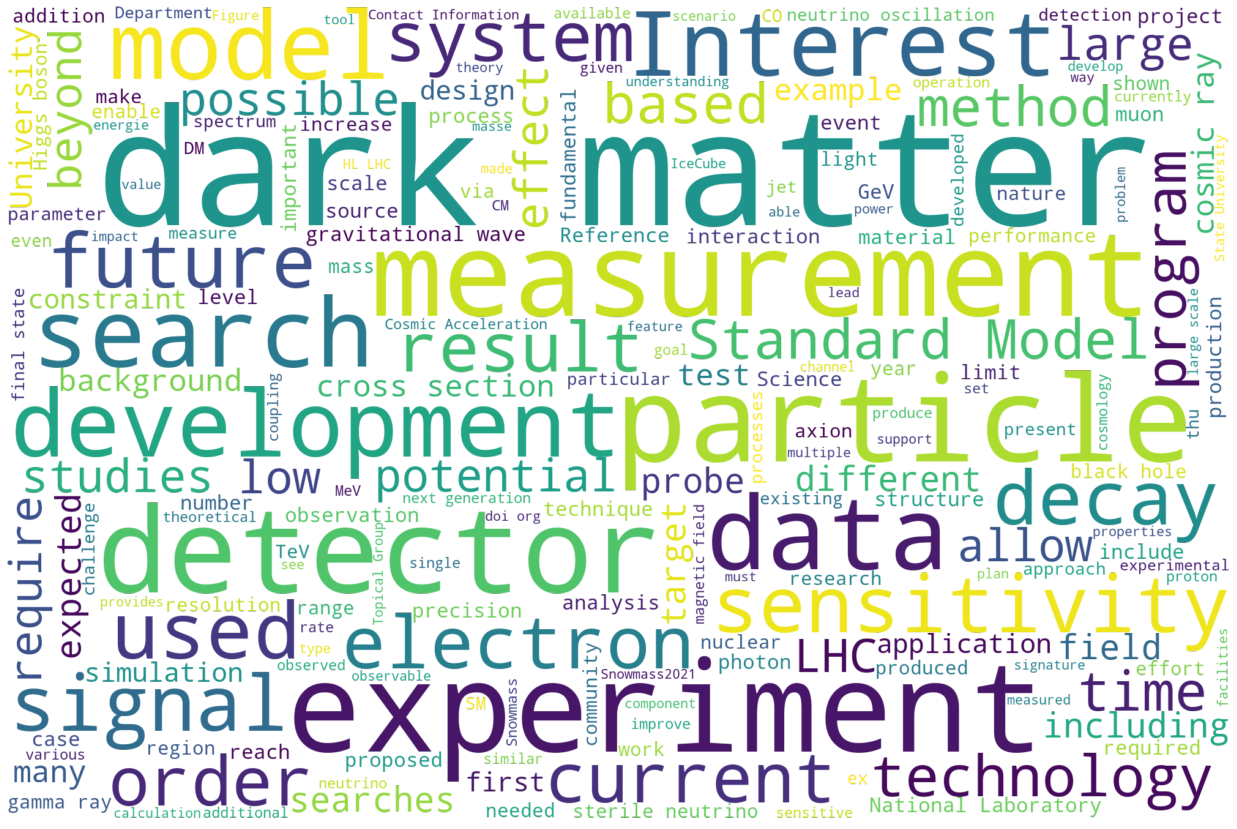

In [4]:
plot_wordcloud(make_wordcloud('all', [f for _, files in text_by_area.items() for f in files]))

## Word clouds by area

AF


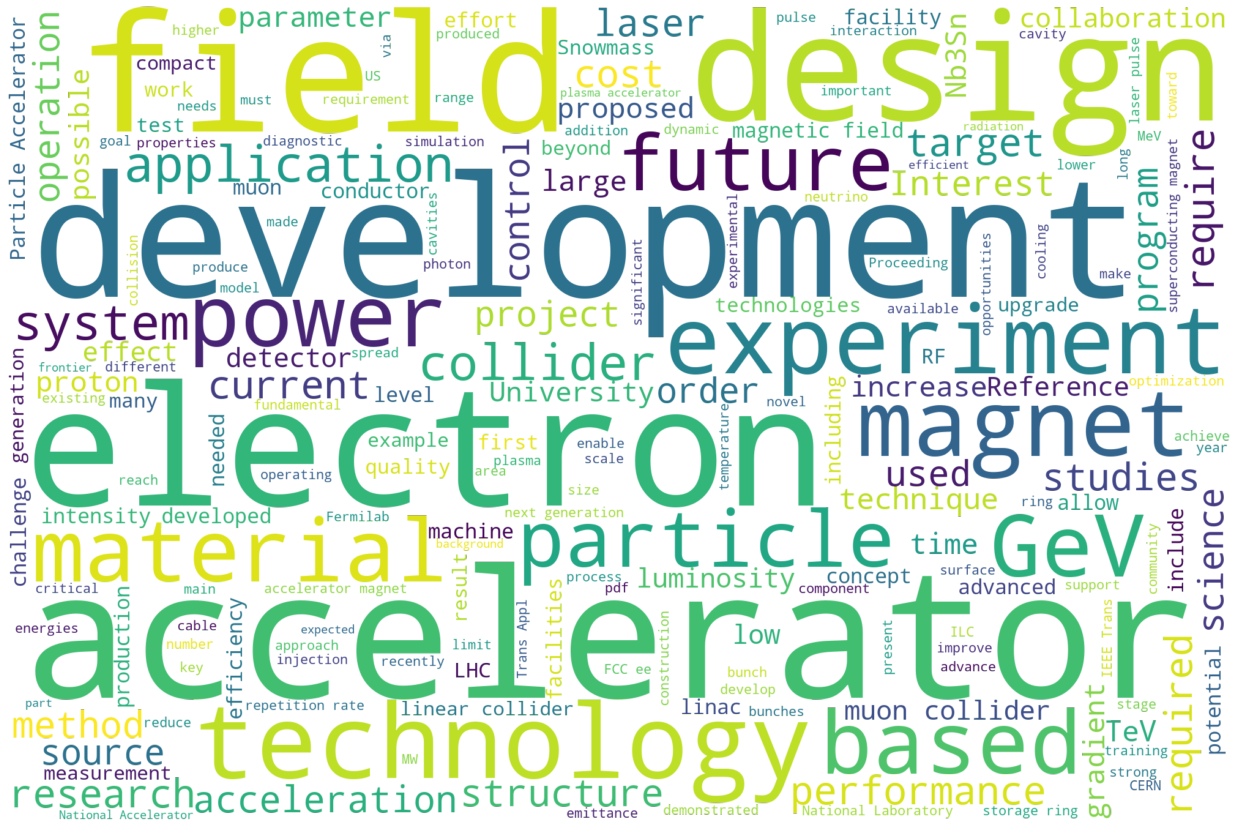

CF


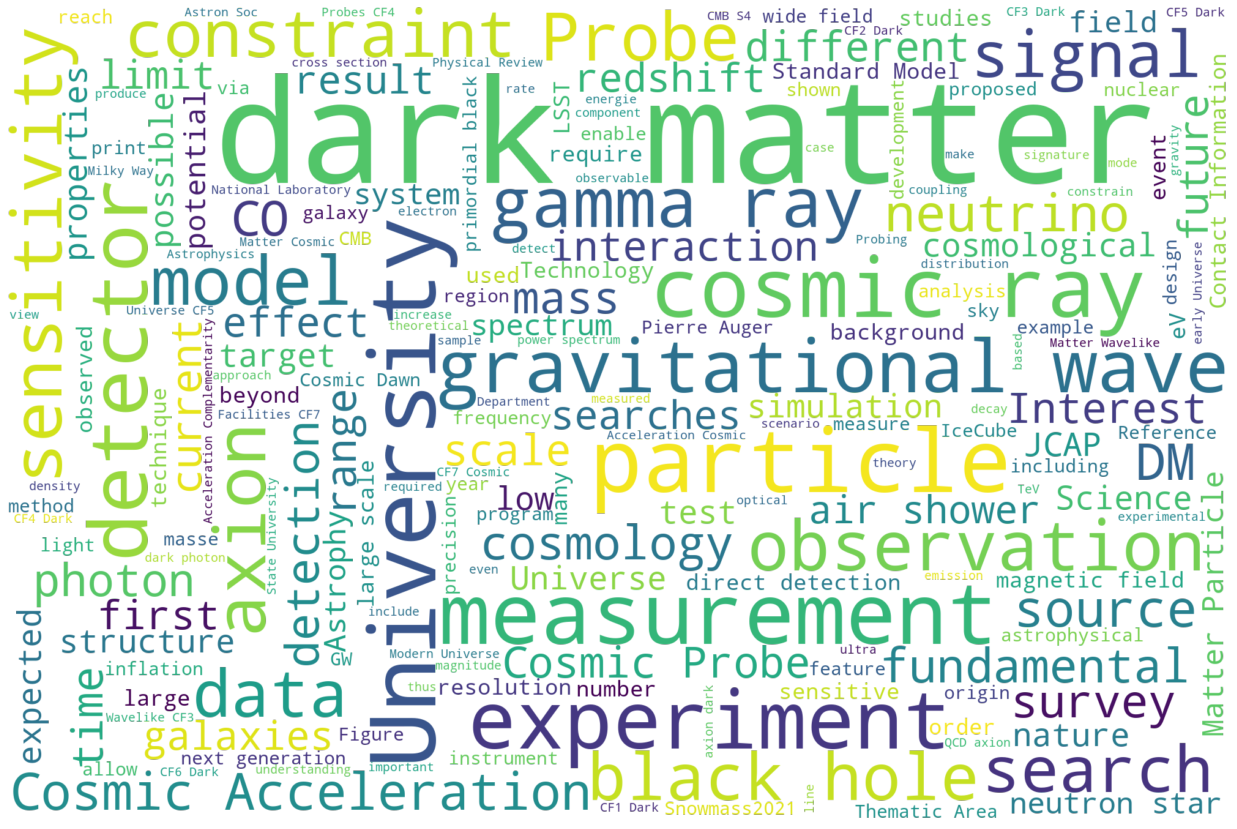

CommF


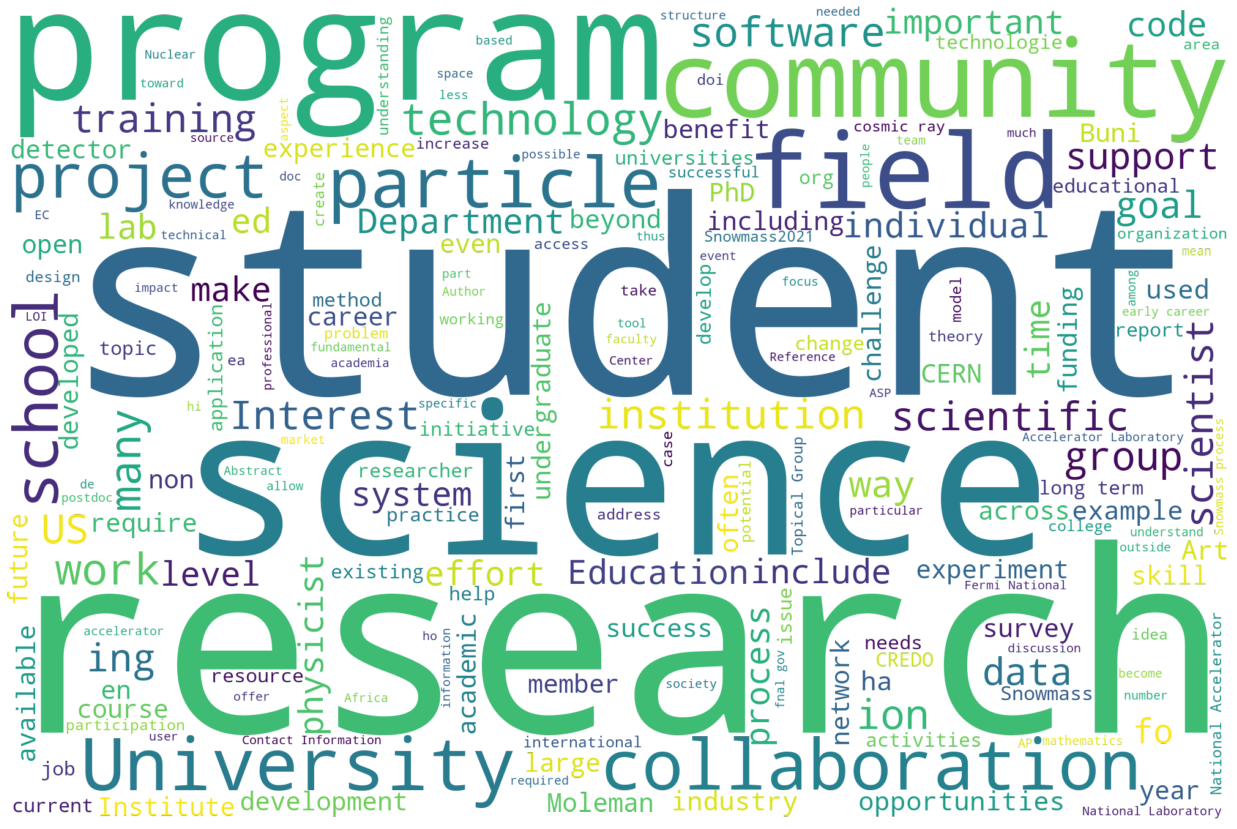

CompF


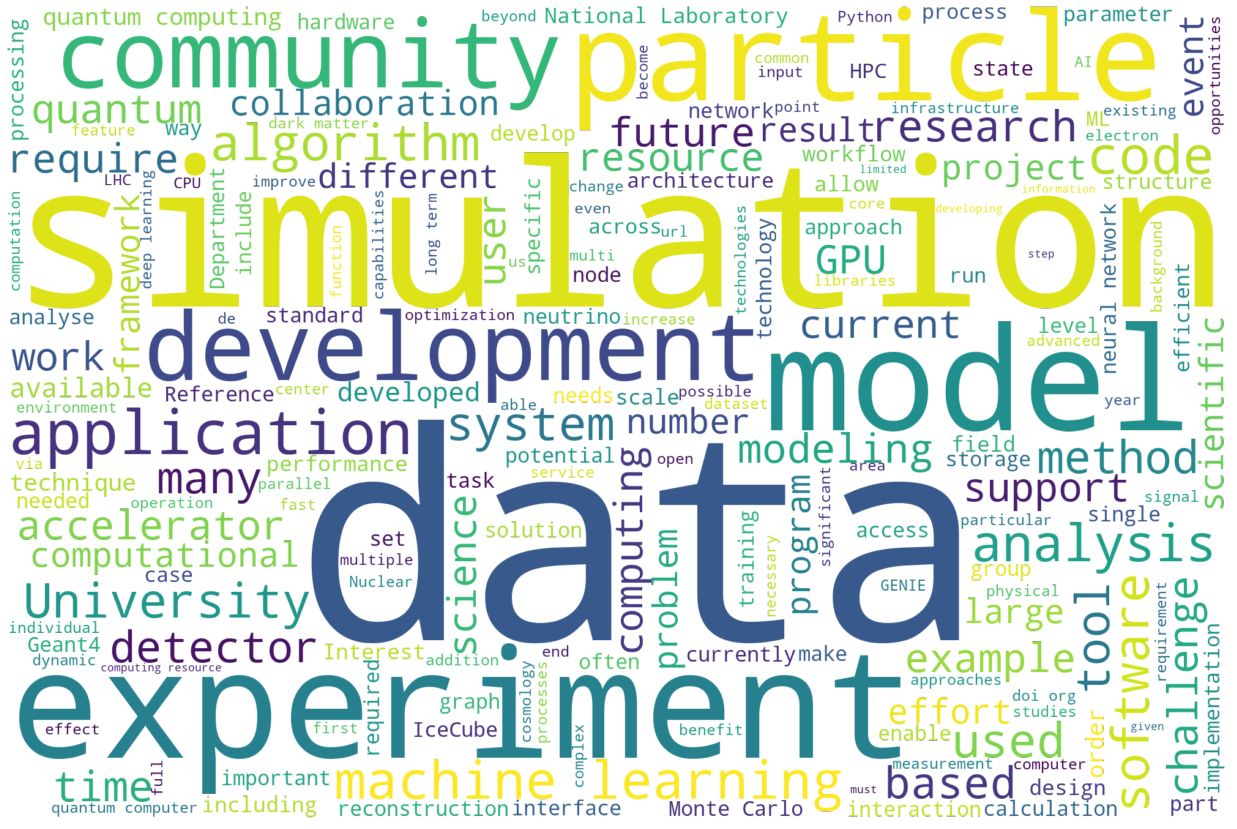

EF


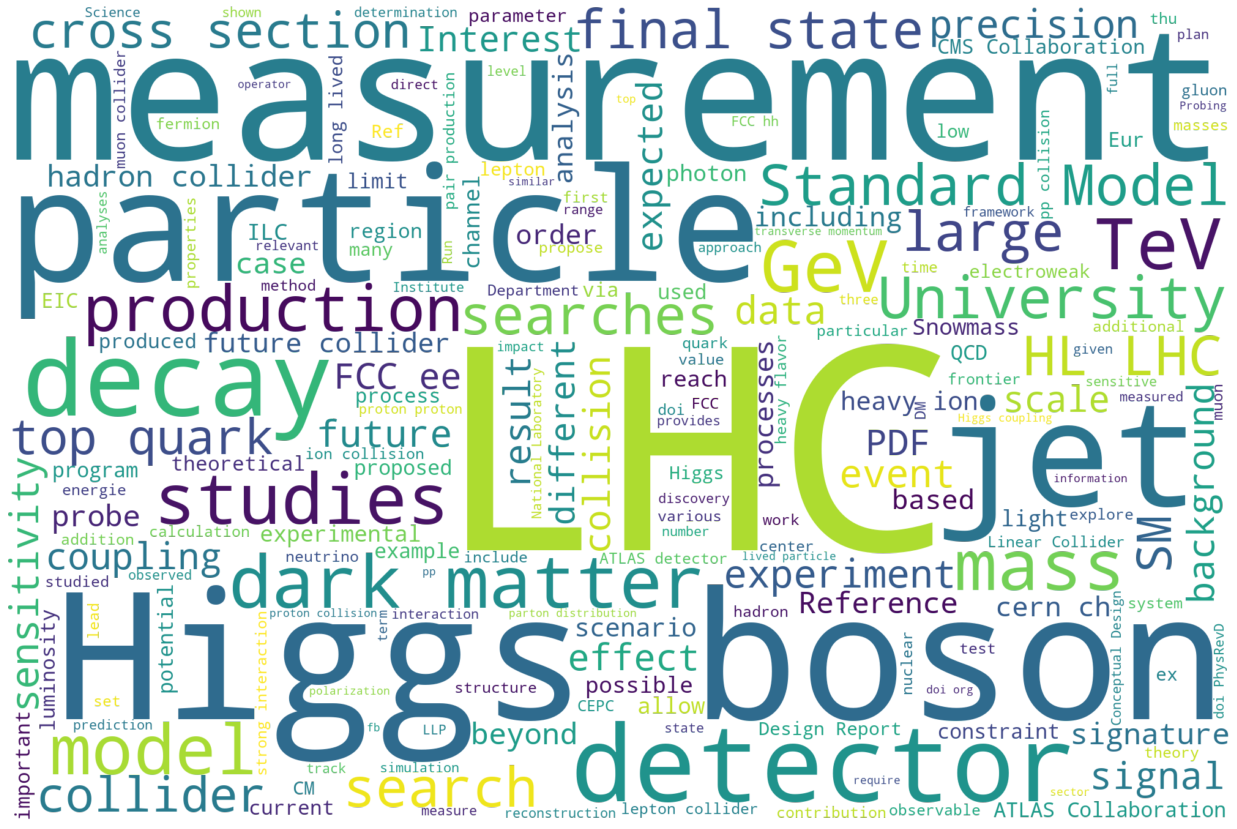

IF


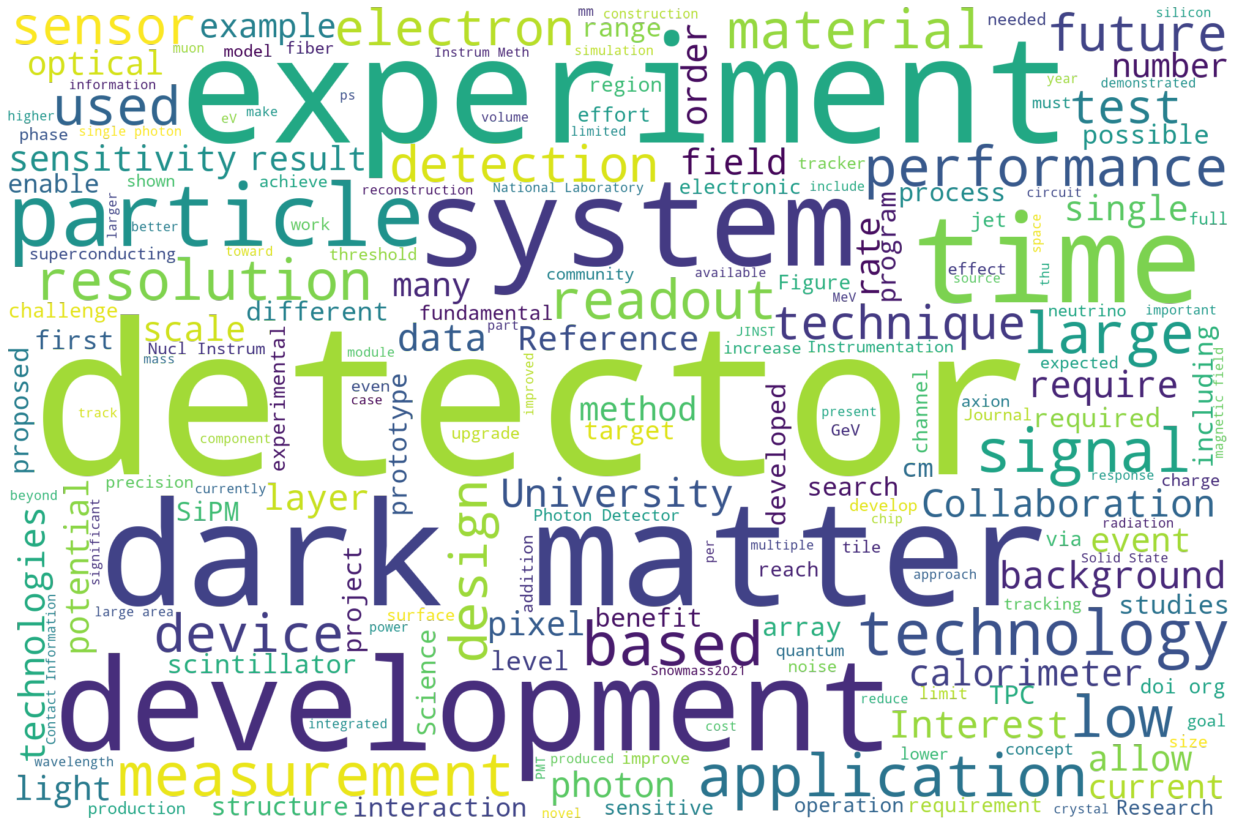

NF


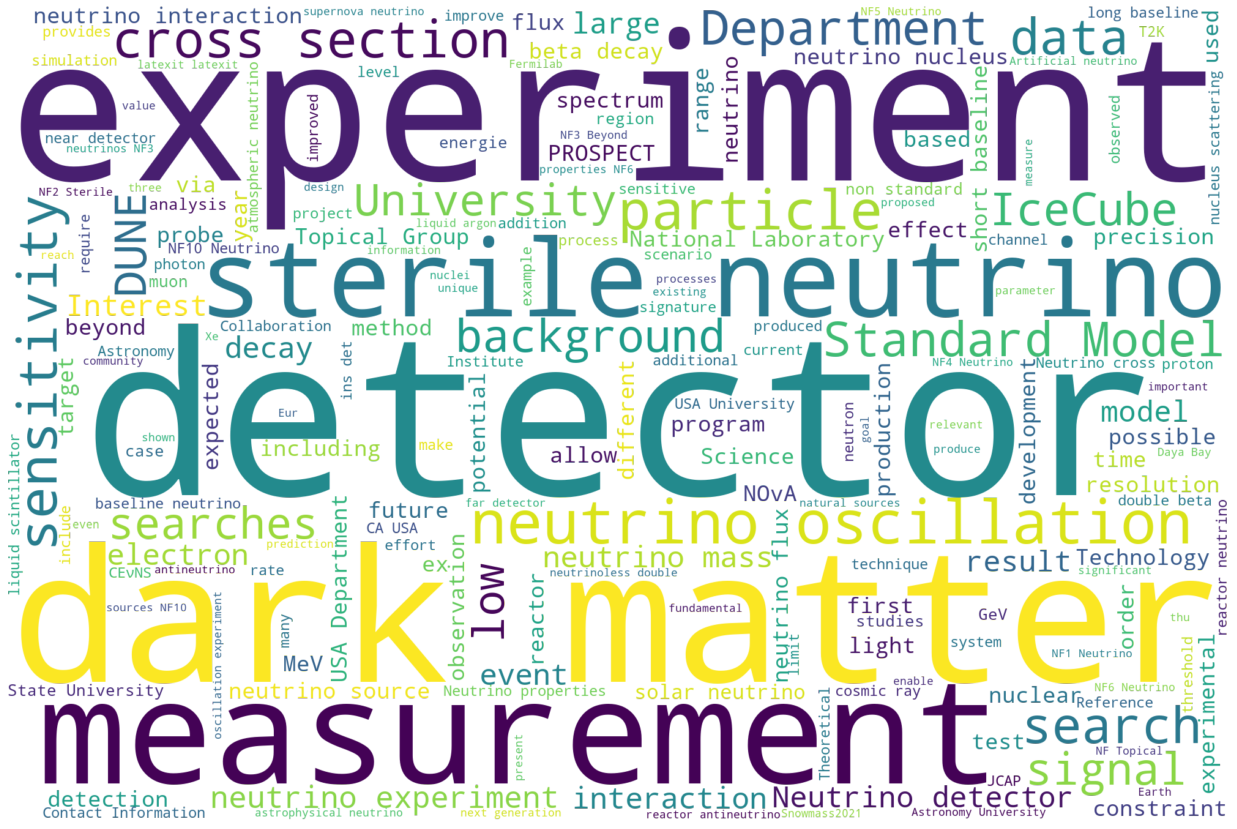

RF


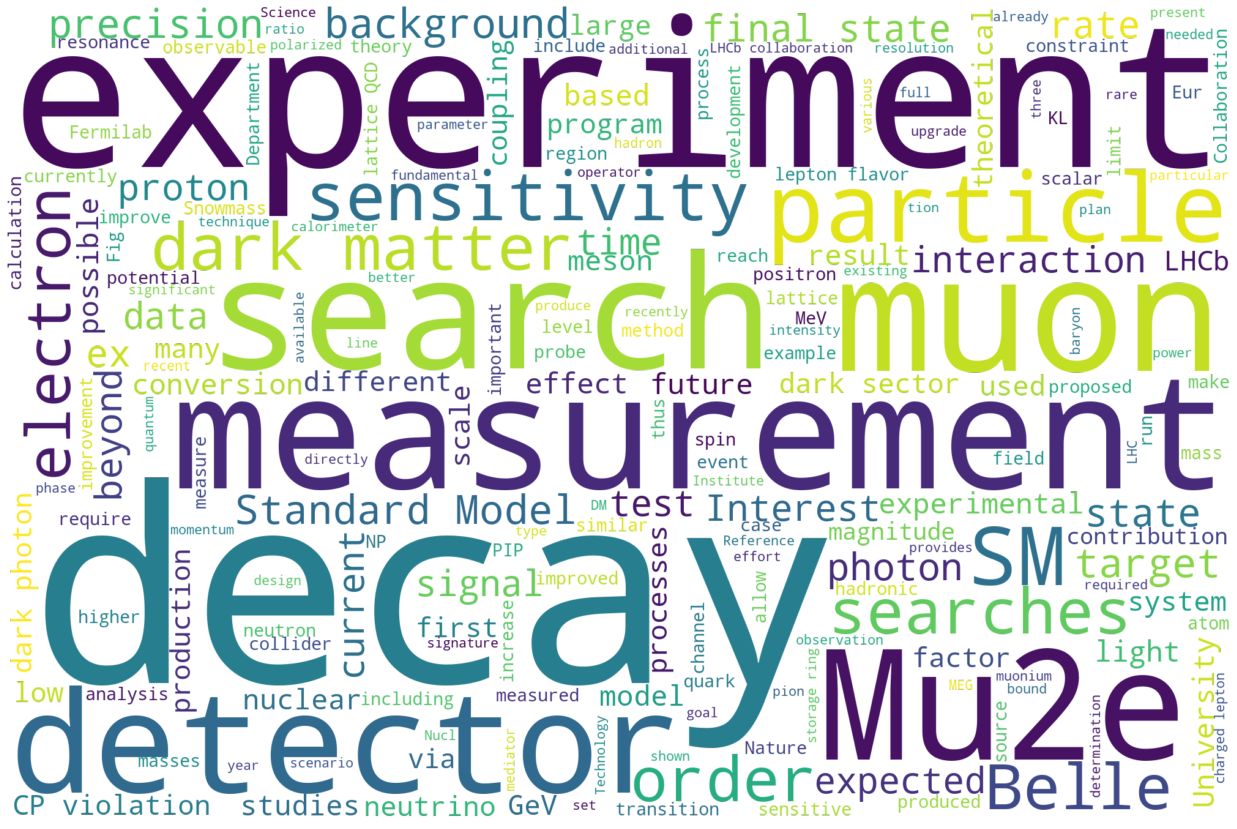

TF


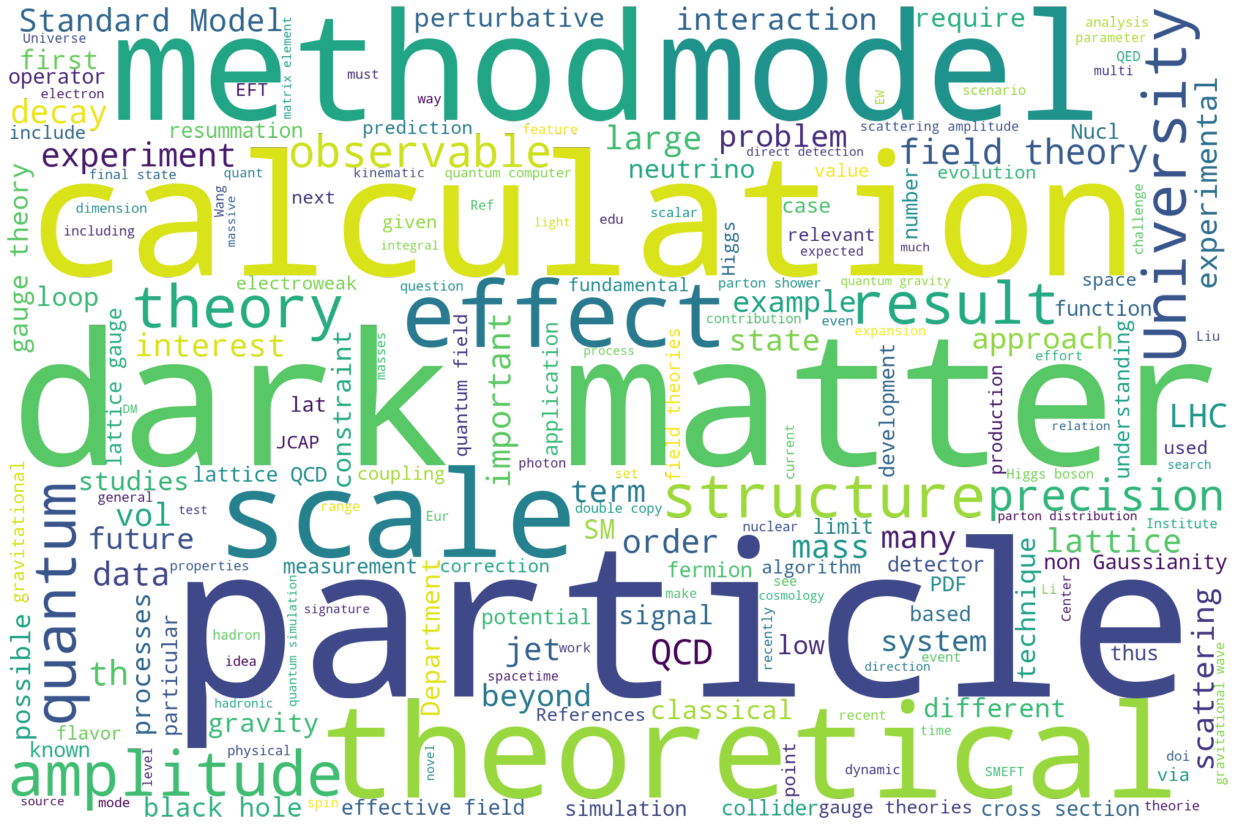

UF


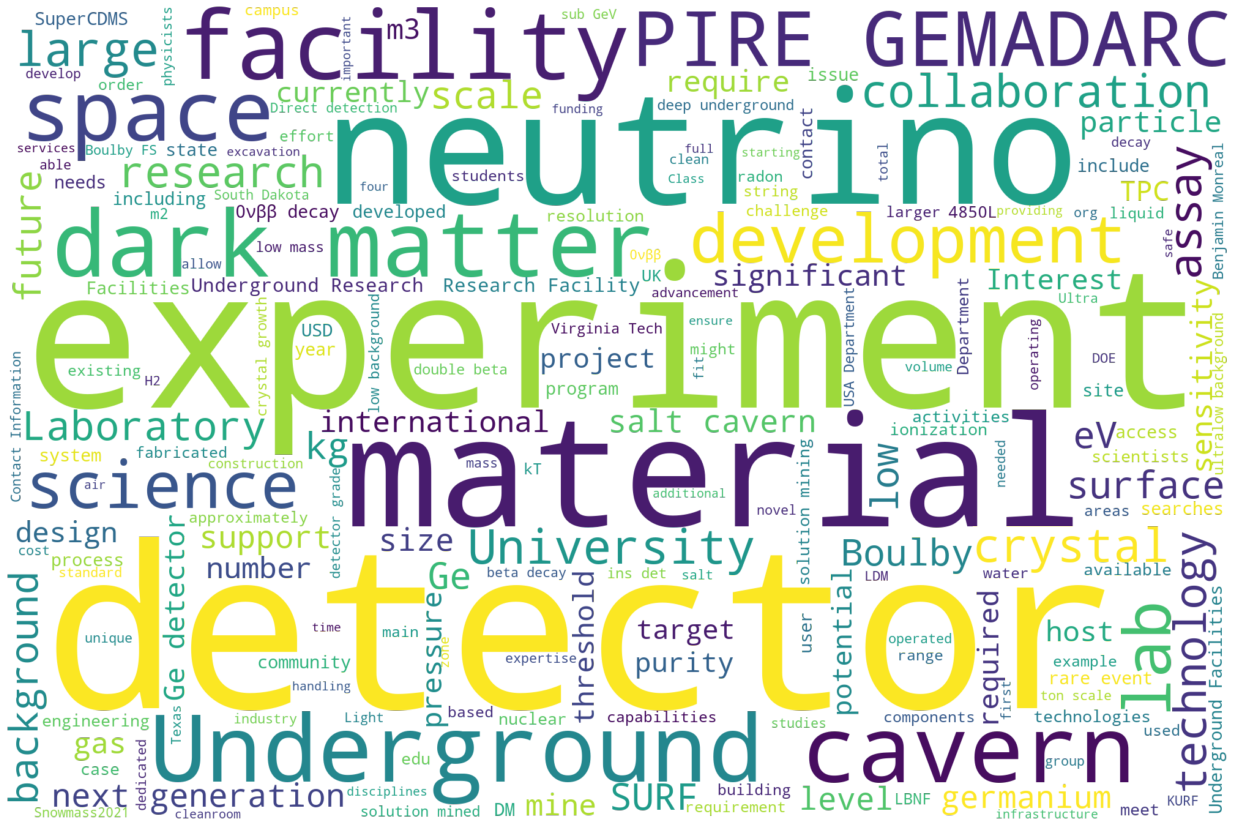

In [5]:
for area, contents in text_by_area.items():
    print(area)
    plot_wordcloud(make_wordcloud(area, [txt for txt in contents]))